In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [81]:

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [3]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('d:/trainT/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

val_generator=val_datagen.flow_from_directory('d:/testT/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='categorical')

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [85]:
base_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=val_generator.n // train_generator.batch_size,
                   epochs=5)

Epoch 1/5
250/250 [==============================] - 50s 199ms/step - loss: 0.1300 - acc: 0.9544 - val_loss: 0.0803 - val_acc: 0.9753
Epoch 2/5
250/250 [==============================] - 29s 116ms/step - loss: 0.0820 - acc: 0.9719 - val_loss: 0.0786 - val_acc: 0.9700
Epoch 3/5
250/250 [==============================] - 29s 116ms/step - loss: 0.0970 - acc: 0.9655 - val_loss: 0.2755 - val_acc: 0.9172
Epoch 4/5
250/250 [==============================] - 29s 116ms/step - loss: 0.0704 - acc: 0.9760 - val_loss: 0.1620 - val_acc: 0.9558
Epoch 5/5
250/250 [==============================] - 29s 116ms/step - loss: 0.0516 - acc: 0.9806 - val_loss: 0.3276 - val_acc: 0.9466


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


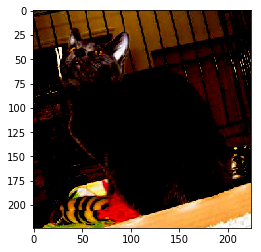

In [27]:

import matplotlib.pyplot as plt
%matplotlib inline


In [79]:
#plt.imshow(x[0,:,:,:]+0.5,aspect=0.9)

x,y = val_generator.next()
a = model.predict(x)
pred = a[:,0] > 0.5
np.mean((y[:,0] > 0.5) == pred)


0.9375